In [29]:
import pandas as pd
from pandas_datareader import  data
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt

# Algorithmic trading
- generate trading signals based on data
- data may be stock_prices, market_data(ask_bid) prices, text data(sec filing, earning call)
- for text data we can assign sentiments positive or negative using dictionary and compare with previous sentiments

In [4]:
#!pip install pandas_datareader

In [6]:
df=data.get_data_yahoo("MSFT","2018-01-01","2019-01-01")

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,86.309998,85.500000,86.129997,85.949997,22483800.0,82.194328
2018-01-03,86.510002,85.970001,86.059998,86.349998,26061400.0,82.576843
2018-01-04,87.660004,86.570000,86.589996,87.110001,21912000.0,83.303658
2018-01-05,88.410004,87.430000,87.660004,88.190002,23407100.0,84.336464
2018-01-08,88.580002,87.599998,88.199997,88.279999,22113000.0,84.422516


In [11]:
import quandl

In [10]:
#!pip install quandl

In [15]:
key=open('quandl_key.txt').readline()

In [17]:
quandl.ApiConfig.api_key=key

In [19]:
aapl=quandl.get("WIKI/AAPL",start_date="2014-01-01",end_date="2016-01-01")

In [20]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-01-02,555.68,557.03,552.021,553.1300,8381600.0,0.0,1.0,73.862376,74.041821,73.376012,73.523423,58671200.0
2014-01-03,552.86,553.70,540.430,540.9800,14016700.0,0.0,1.0,73.487534,73.599189,71.835308,71.908415,98116900.0
2014-01-06,537.45,546.80,533.600,543.9300,14736100.0,0.0,1.0,71.439198,72.682024,70.927447,72.300536,103152700.0
2014-01-07,544.32,545.96,537.925,540.0375,11328900.0,0.0,1.0,72.352376,72.570369,71.502337,71.783135,79302300.0
2014-01-08,538.81,545.56,538.690,543.4600,9233200.0,0.0,1.0,71.619973,72.517200,71.604022,72.238063,64632400.0


In [21]:
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,207.655886,209.401200,205.933348,207.720361,4.325065e+07,0.018472,1.011905,101.022717,101.910366,100.050240,100.981293,5.748111e+07
std,181.295916,182.711415,180.209083,181.596856,2.529600e+07,0.206401,0.267261,17.647335,17.778989,17.408633,17.576358,2.621384e+07
min,90.210000,90.700000,89.650000,90.280000,5.704900e+06,0.000000,1.000000,65.820564,66.664622,65.603901,66.432274,1.304644e+07
25%,108.965000,109.877500,107.357500,108.807500,2.884406e+07,0.000000,1.000000,88.472275,89.186435,87.706347,88.399800,4.090542e+07
50%,118.185000,119.275000,116.990000,118.627500,4.299648e+07,0.000000,1.000000,105.840125,107.008471,104.000621,105.378759,5.132292e+07
75%,130.005000,130.872500,128.962500,129.985000,5.569448e+07,0.000000,1.000000,115.537603,116.648726,114.656560,115.433970,6.823911e+07
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,128.233349,128.314416,125.839962,126.931724,2.663808e+08


In [22]:
aapl.to_csv("aapl_2014_2016.csv")

In [23]:
aapl['change']=aapl['Open']-aapl['Close']

In [24]:
aapl['pct_change']=aapl['change']/aapl['Open']

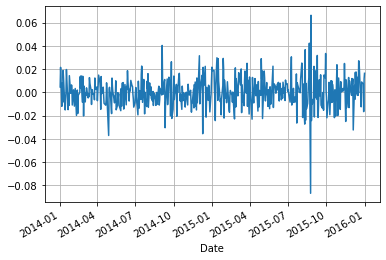

In [27]:
aapl['pct_change'].plot(grid=True)
plt.show()

In [34]:
def get(tickers,start_date,end_date):
    def data(ticker):
        return pdr.get_data_yahoo(ticker,start_date,end_date)
    datas=map(data,tickers)
    return pd.concat(datas,keys=tickers,names=['Ticker','Date'])

In [35]:
tickers=['MSFT','GE','AAPL']
all_data=get(tickers,datetime.datetime(2015,1,1),datetime.datetime(2017,1,1))

In [36]:
all_data.head()

High        Low       Open      Close      Volume  \
Ticker Date                                                                 
MSFT   2014-12-31  47.439999  46.450001  46.730000  46.450001  21552500.0   
       2015-01-02  47.419998  46.540001  46.660000  46.759998  27913900.0   
       2015-01-05  46.730000  46.250000  46.369999  46.330002  39673900.0   
       2015-01-06  46.750000  45.540001  46.380001  45.650002  36447900.0   
       2015-01-07  46.459999  45.490002  45.980000  46.230000  29114100.0   

                   Adj Close  
Ticker Date                   
MSFT   2014-12-31  41.168922  
       2015-01-02  41.443684  
       2015-01-05  41.062580  
       2015-01-06  40.459892  
       2015-01-07  40.973934

In [37]:
all_data.to_csv("all_data.csv")